In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('sample_company.xlsx')
df.head()

,type1,type2,label
0,10000,10000,1
1,10000,10000,1
2,10000,10000,1
3,10000,10000,1
4,10000,10000,1


# ヒートマップ作成準備
## ヒートマップの行と列の要素を同じものにする
ヒートマップの行：type1, 列：type2それぞれに足りない要素を補っていく

In [3]:
'''type1のユニークな要素をリストで抽出'''
type1_list = df['type1'].drop_duplicates().tolist()
type1_list

[10000, 20000, 30000, 40000, 70000]

In [4]:
'''type2のユニークな要素をリストで抽出'''
type2_list = df['type2'].drop_duplicates().tolist()
type2_list

[10000, 20000, 30000, 50000, 60000]

In [5]:
'''type1,type2を比較し、どちらか一方にしかない値を抽出'''
diff_set = set(type1_list)^set(type2_list)#2つのリストを比較し、重複していない要素のみ抽出
diff_list = list(diff_set)#  set型をlist型に変換
diff_list

[40000, 60000, 70000, 50000]

In [6]:
'''抽出した重複していない要素のうち、type1に含まれていない要素のみ抽出'''
subtraction_diff_type1_list= list(set(diff_list) - set(type1_list))
subtraction_diff_type1_list

[50000, 60000]

In [7]:
'''抽出した重複していない要素のうち、type2に含まれていない要素のみ抽出'''
# 参考URL:https://dot-blog.jp/news/python-two-list-difference/
subtraction_diff_type2_list= list(set(diff_list) - set(type2_list))
subtraction_diff_type2_list

[40000, 70000]

In [8]:
'''type1,type2に含まれていない要素の組み合わせの総当たりを抽出'''
# itertools.product():複数のリストの直積（デカルト積）を生成
# 直積（デカルト積）は、複数の集合から要素を一つずつ取り出した組み合わせの集合
# 例えば2つのリストがあったとき、すべてのペアの組み合わせのリストが直積
# 参考URL:http://tt-house.com/2016/06/python-itertools.html
# 参考URL:https://note.nkmk.me/python-itertools-product/

import itertools

type1_2_list = [[x, y] for x, y in itertools.product(subtraction_diff_type1_list, subtraction_diff_type2_list)]
type1_2_list

[[50000, 40000], [50000, 70000], [60000, 40000], [60000, 70000]]

In [9]:
'''組み合わせの総当たり分とlabel=0を格納したデータフレームを作成'''
add_df = pd.DataFrame(type1_2_list,
                      columns=['type1', 'type2'])
add_df['label'] = 0
add_df

,type1,type2,label
0,50000,40000,0
1,50000,70000,0
2,60000,40000,0
3,60000,70000,0


In [10]:
'''新規作成したデータフレームを元のデータフレームに縦に連結'''
concat_df = pd.concat([df, add_df]).reset_index(drop=True)#インデックス番号を振り直すのみ、列側には移動させない
concat_df.tail()

,type1,type2,label
37,70000,60000,1
38,50000,40000,0
39,50000,70000,0
40,60000,40000,0
41,60000,70000,0


## ヒートマップ描画

In [11]:
'''ピボットテーブル作成'''
pivot_df = pd.pivot_table(concat_df,
                          index='type1',
                          columns='type2',
                          values='label',
                          aggfunc='count',
                          fill_value=0
                         )

pivot_df

type2,10000,20000,30000,40000,50000,60000,70000
type1,,,,,,,
10000,9,7,0,0,0,0,0
20000,0,2,11,0,0,0,0
30000,0,0,2,0,0,0,0
40000,0,0,3,0,2,0,0
50000,0,0,0,1,0,0,1
60000,0,0,0,1,0,0,1
70000,0,0,0,0,0,2,0


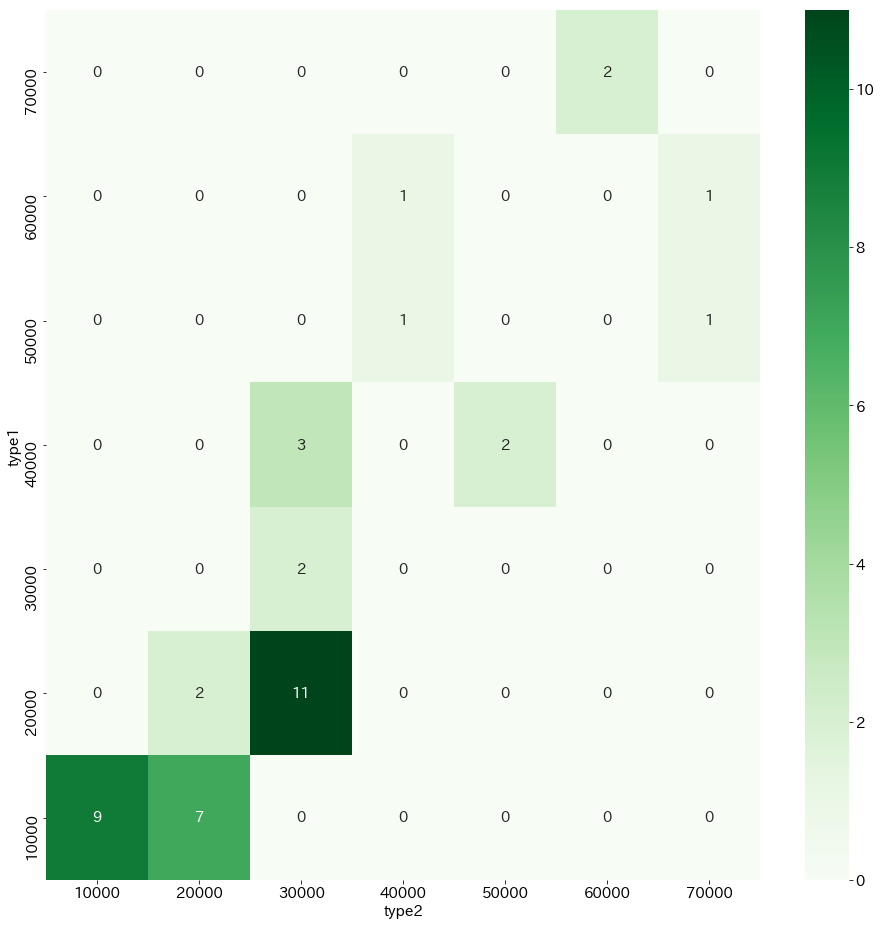

In [12]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

graph_params = {
    'axes.labelsize':15,
    'axes.titlesize':15,
    'xtick.labelsize':15,
    'figure.figsize' : [16, 16],
    'ytick.labelsize' : 15,
    'legend.fontsize' : 15,
}
plt.rcParams.update(**graph_params)

sns.heatmap(pivot_df.sort_values('type1', ascending=False), annot=True, annot_kws={'size': 15}, cmap ='Greens')